In [50]:
def format_raw_prices(df):
    """
    Format raw prices DataFrame
    Parameters
    ----------
    df: pd.DataFrame
        Must have index as datetime
    """
    prices_df = df.copy()
    prices_df['date'] = pd.to_datetime(prices_df['date'])
    print(prices_df.shape)

    # Extract the day as YYYY-MM-DD
    prices_df['day'] = prices_df['date'].dt.date
    prices_df['day'] = pd.to_datetime(prices_df['day'])
    
    # Extract the time as HH:MM:SS
    prices_df['time'] = prices_df['date'].dt.time

    # Calculate the time ID (minute of the day from 1 to 1440)
    prices_df['time_id'] = prices_df['date'].dt.hour * 60 + prices_df['date'].dt.minute + 1

    return prices_df

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import add_trading_hours


In [5]:
WORKING_DIR = "~/Dropbox/ibis"

In [51]:
# Define the parameters
asset_type = "stock"        # Example values: stock, etf, futures, crypto, index, fx
period = "full"             # Example values: full, month, week, day
timeframe = "1min"          # Example values: 1min, 5min, 30min, 1hour, 1day
adjustment = "adj_splitdiv"    # Example values: adj_split, adj_splitdiv, UNADJUSTED

#STOCK_DATA_DIR = "/home/ubuntu/ibis/data/frd-historical/stock/csv/1min/adj_splitdiv"
#STOCK_DATA_DIR = f"/home/ubuntu/ibis/data/frd-historical/{asset_type}/csv/{timeframe}/{adjustment}"
STOCK_DATA_DIR = os.path.join(WORKING_DIR, "data/tmp")

ticker = 'RDFN'
stock_csv_filename = "_".join([ticker, period, timeframe, adjustment.replace("_", '')]) + ".txt"
fp = os.path.join(STOCK_DATA_DIR, stock_csv_filename)
print(stock_csv_filename)
print(fp)
rdfn_df = format_raw_prices(
    pd.read_csv(fp, parse_dates=True, header=None, names=['date', 'open', 'high', 'low', 'close', 'volume'])
)
print(rdfn_df.info())
rdfn_df

RDFN_full_1min_adjsplitdiv.txt
~/Dropbox/ibis/data/tmp/RDFN_full_1min_adjsplitdiv.txt
(676379, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676379 entries, 0 to 676378
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   date     676379 non-null  datetime64[ns]
 1   open     676379 non-null  float64       
 2   high     676379 non-null  float64       
 3   low      676379 non-null  float64       
 4   close    676379 non-null  float64       
 5   volume   676379 non-null  int64         
 6   day      676379 non-null  datetime64[ns]
 7   time     676379 non-null  object        
 8   time_id  676379 non-null  int32         
dtypes: datetime64[ns](2), float64(4), int32(1), int64(1), object(1)
memory usage: 43.9+ MB
None


,date,open,high,low,close,volume,day,time,time_id
0,2017-07-28 11:05:00,19.5600,19.7600,19.5100,19.6700,1573865,2017-07-28,11:05:00,666
1,2017-07-28 11:06:00,19.7100,20.0700,19.6300,19.9700,389751,2017-07-28,11:06:00,667
2,2017-07-28 11:07:00,19.9800,20.3600,19.9200,20.0800,218754,2017-07-28,11:07:00,668
3,2017-07-28 11:08:00,20.1500,20.6920,20.1250,20.6920,253592,2017-07-28,11:08:00,669
4,2017-07-28 11:09:00,20.6800,20.9200,20.2200,20.4000,125916,2017-07-28,11:09:00,670
...,...,...,...,...,...,...,...,...,...
676374,2024-07-19 18:35:00,7.9200,7.9200,7.9200,7.9200,111,2024-07-19,18:35:00,1116
676375,2024-07-19 19:11:00,7.9200,7.9200,7.9200,7.9200,100,2024-07-19,19:11:00,1152
676376,2024-07-19 19:24:00,7.9191,7.9191,7.9191,7.9191,150,2024-07-19,19:24:00,1165
676377,2024-07-19 19:46:00,7.9000,7.9000,7.9000,7.9000,6375,2024-07-19,19:46:00,1187


# Density forecasting

In [159]:
rdfn_1min_df = rdfn_df.copy()
rdfn_1min_df

,date,open,high,low,close,volume,day,time,time_id
0,2017-07-28 11:05:00,19.5600,19.7600,19.5100,19.6700,1573865,2017-07-28,11:05:00,666
1,2017-07-28 11:06:00,19.7100,20.0700,19.6300,19.9700,389751,2017-07-28,11:06:00,667
2,2017-07-28 11:07:00,19.9800,20.3600,19.9200,20.0800,218754,2017-07-28,11:07:00,668
3,2017-07-28 11:08:00,20.1500,20.6920,20.1250,20.6920,253592,2017-07-28,11:08:00,669
4,2017-07-28 11:09:00,20.6800,20.9200,20.2200,20.4000,125916,2017-07-28,11:09:00,670
...,...,...,...,...,...,...,...,...,...
676374,2024-07-19 18:35:00,7.9200,7.9200,7.9200,7.9200,111,2024-07-19,18:35:00,1116
676375,2024-07-19 19:11:00,7.9200,7.9200,7.9200,7.9200,100,2024-07-19,19:11:00,1152
676376,2024-07-19 19:24:00,7.9191,7.9191,7.9191,7.9191,150,2024-07-19,19:24:00,1165
676377,2024-07-19 19:46:00,7.9000,7.9000,7.9000,7.9000,6375,2024-07-19,19:46:00,1187


In [162]:
day = '2024-07-18'
X_07182024 = rdfn_1min_df[rdfn_1min_df['day'] == day]
X_07182024

,date,open,high,low,close,volume,day,time,time_id
675532,2024-07-18 06:00:00,8.4600,8.4600,8.4600,8.4600,119,2024-07-18,06:00:00,361
675533,2024-07-18 07:25:00,8.4400,8.4400,8.4400,8.4400,100,2024-07-18,07:25:00,446
675534,2024-07-18 07:39:00,8.4500,8.4500,8.4500,8.4500,100,2024-07-18,07:39:00,460
675535,2024-07-18 08:00:00,8.4000,8.5000,8.3616,8.4500,8410,2024-07-18,08:00:00,481
675536,2024-07-18 08:03:00,8.5500,8.5500,8.5500,8.5500,500,2024-07-18,08:03:00,484
...,...,...,...,...,...,...,...,...,...
675965,2024-07-18 19:26:00,8.0500,8.0500,8.0500,8.0500,500,2024-07-18,19:26:00,1167
675966,2024-07-18 19:28:00,8.0500,8.0500,8.0500,8.0500,600,2024-07-18,19:28:00,1169
675967,2024-07-18 19:31:00,8.0518,8.0518,8.0518,8.0518,250,2024-07-18,19:31:00,1172
675968,2024-07-18 19:58:00,8.0600,8.0600,8.0600,8.0600,630,2024-07-18,19:58:00,1199


(array([28., 83., 31.,  7., 65., 87., 47., 13., 44., 33.]),
 array([7.925  , 8.01338, 8.10176, 8.19014, 8.27852, 8.3669 , 8.45528,
        8.54366, 8.63204, 8.72042, 8.8088 ]),
 <BarContainer object of 10 artists>)

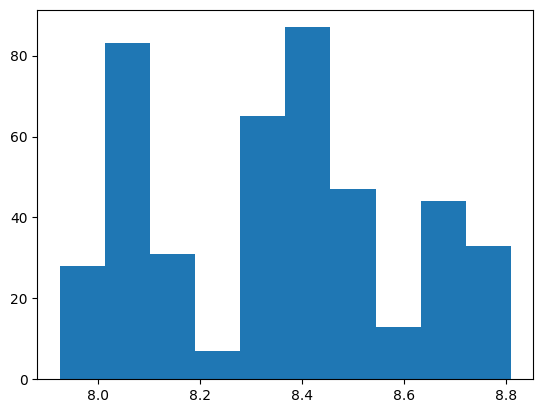

In [163]:
plt.hist(X_07182024['high'])

# Macro forecasting

In [52]:
FRED_SERIES = 'DFII10'
tips_df = pd.read_csv(os.path.join(WORKING_DIR, 'data', FRED_SERIES+'.csv'), parse_dates=True)
tips_df.columns = ['day', FRED_SERIES]
tips_df['day'] = pd.to_datetime(tips_df['day'])
print(tips_df.info())
tips_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306 entries, 0 to 1305
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   day     1306 non-null   datetime64[ns]
 1   DFII10  1306 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 20.5+ KB
None


,day,DFII10
0,2019-08-15,-0.02
1,2019-08-16,0.01
2,2019-08-19,0.04
3,2019-08-20,0.02
4,2019-08-21,0.05
...,...,...
1301,2024-08-09,1.84
1302,2024-08-12,1.79
1303,2024-08-13,1.76
1304,2024-08-14,1.77


In [58]:
rdfn_df.info()
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676379 entries, 0 to 676378
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   date     676379 non-null  datetime64[ns]
 1   open     676379 non-null  float64       
 2   high     676379 non-null  float64       
 3   low      676379 non-null  float64       
 4   close    676379 non-null  float64       
 5   volume   676379 non-null  int64         
 6   day      676379 non-null  datetime64[ns]
 7   time     676379 non-null  object        
 8   time_id  676379 non-null  int32         
dtypes: datetime64[ns](2), float64(4), int32(1), int64(1), object(1)
memory usage: 43.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306 entries, 0 to 1305
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   day     1306 non-null   datetime64[ns]
 1   DFII10  1306 non-null   object        
dtypes: da

In [56]:
print(rdfn_df.shape, tips_df.shape)
X = rdfn_df.merge(tips_df, left_on='day', right_on='day', how='inner')
print(X.shape)
X

(676379, 9) (1306, 2)
(496910, 10)


,date,open,high,low,close,volume,day,time,time_id,DFII10
0,2019-08-15 09:29:00,17.6800,17.6800,17.6800,17.6800,100,2019-08-15,09:29:00,570,-0.02
1,2019-08-15 09:30:00,17.6500,17.6500,17.6350,17.6400,14924,2019-08-15,09:30:00,571,-0.02
2,2019-08-15 09:31:00,17.6400,17.6650,17.6300,17.6300,1800,2019-08-15,09:31:00,572,-0.02
3,2019-08-15 09:32:00,17.6400,17.6600,17.5800,17.5800,832,2019-08-15,09:32:00,573,-0.02
4,2019-08-15 09:33:00,17.5800,17.6250,17.5800,17.6250,300,2019-08-15,09:33:00,574,-0.02
...,...,...,...,...,...,...,...,...,...,...
496905,2024-07-19 18:35:00,7.9200,7.9200,7.9200,7.9200,111,2024-07-19,18:35:00,1116,1.93
496906,2024-07-19 19:11:00,7.9200,7.9200,7.9200,7.9200,100,2024-07-19,19:11:00,1152,1.93
496907,2024-07-19 19:24:00,7.9191,7.9191,7.9191,7.9191,150,2024-07-19,19:24:00,1165,1.93
496908,2024-07-19 19:46:00,7.9000,7.9000,7.9000,7.9000,6375,2024-07-19,19:46:00,1187,1.93


In [61]:
# resample to get daily ohlc
rdfn_daily = rdfn_df.resample('D', on='day').agg({'open': 'first', 'high':'max', 'low':'min', 'close': 'last', 'volume':'sum'}).reset_index()
rdfn_daily

,day,open,high,low,close,volume
0,2017-07-28,19.56,22.1100,19.290,21.88,9214451
1,2017-07-29,NaN,NaN,NaN,NaN,0
2,2017-07-30,NaN,NaN,NaN,NaN,0
3,2017-07-31,21.98,25.1100,21.900,24.03,4149156
4,2017-08-01,24.03,28.7000,24.030,27.00,3538352
...,...,...,...,...,...,...
2544,2024-07-15,7.77,8.3500,7.330,8.27,8276826
2545,2024-07-16,8.27,8.5250,7.950,8.47,7267291
2546,2024-07-17,8.35,8.7300,8.080,8.47,5536973
2547,2024-07-18,8.46,8.8088,7.900,8.07,5105574


In [88]:
def float_or_na(x):
    try:
        return float(x)
    except:
        return np.nan
X = rdfn_daily.merge(tips_df)
X[FRED_SERIES] = X[FRED_SERIES].apply(float_or_na)
X[FRED_SERIES+'_lag1'] = X[FRED_SERIES].shift(1)
X['high_lag1'] = X['high'].shift(1)
print(X.info())
X

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287 entries, 0 to 1286
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   day          1287 non-null   datetime64[ns]
 1   open         1240 non-null   float64       
 2   high         1240 non-null   float64       
 3   low          1240 non-null   float64       
 4   close        1240 non-null   float64       
 5   volume       1287 non-null   int64         
 6   DFII10       1233 non-null   float64       
 7   DFII10_lag1  1232 non-null   float64       
 8   high_lag1    1239 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 90.6 KB
None


,day,open,high,low,close,volume,DFII10,DFII10_lag1,high_lag1
0,2019-08-15,17.68,17.6800,16.760,16.88,1270477,-0.02,NaN,NaN
1,2019-08-16,16.93,17.2050,16.580,17.00,1186806,0.01,-0.02,17.6800
2,2019-08-19,17.30,17.3000,16.630,17.05,800110,0.04,0.01,17.2050
3,2019-08-20,17.09,17.5750,16.950,17.45,716016,0.02,0.04,17.3000
4,2019-08-21,17.58,18.4900,17.580,18.39,883559,0.05,0.02,17.5750
...,...,...,...,...,...,...,...,...,...
1282,2024-07-15,7.77,8.3500,7.330,8.27,8276826,1.96,1.94,7.7500
1283,2024-07-16,8.27,8.5250,7.950,8.47,7267291,1.91,1.96,8.3500
1284,2024-07-17,8.35,8.7300,8.080,8.47,5536973,1.90,1.91,8.5250
1285,2024-07-18,8.46,8.8088,7.900,8.07,5105574,1.89,1.90,8.7300


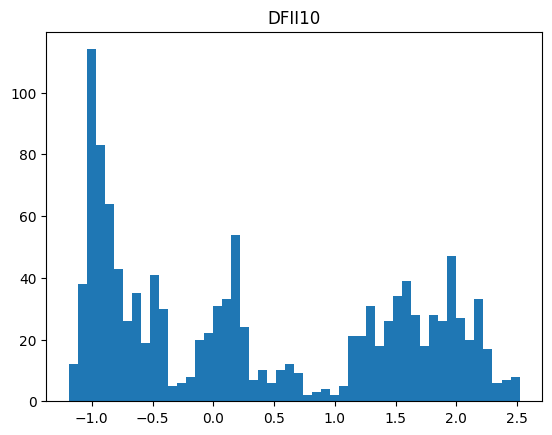

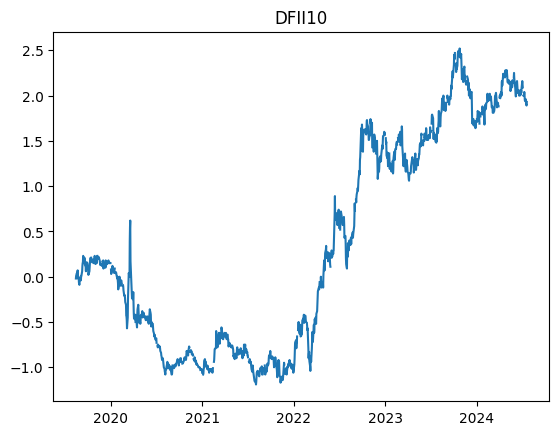

54


,DFII10
count,1287.000000
mean,0.353046
std,1.173275
min,-1.190000
25%,-0.820000
50%,0.130000
75%,1.550000
max,2.520000


In [82]:
# EDA on FRED series

# histogram
plt.hist(X[FRED_SERIES], bins=50)
plt.title(FRED_SERIES)
plt.show()

# line plot
plt.plot(X['day'], X[FRED_SERIES])
plt.title(FRED_SERIES)
plt.show()

# count NA's
print(X[FRED_SERIES].isna().sum())

# forward fill NA'
X[FRED_SERIES] = X[FRED_SERIES].ffill()
X[[FRED_SERIES]].describe()


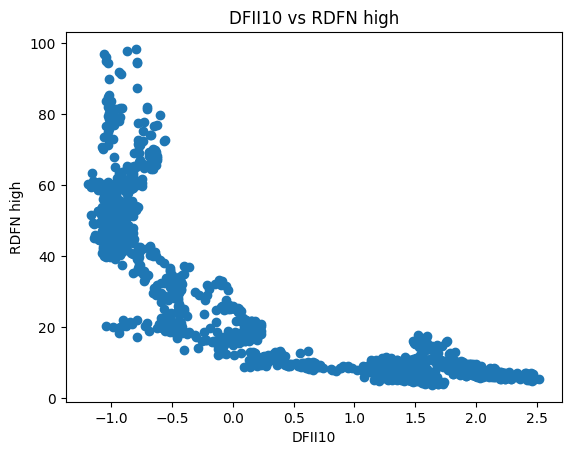

In [85]:
# scatter plot RDFN 'high' vs FRED series
plt.scatter(X[FRED_SERIES+'_lag1'], X['high'])
plt.title(f"{FRED_SERIES} vs RDFN high")
plt.xlabel(FRED_SERIES)
plt.ylabel('RDFN high')
plt.show()


In [90]:
features

,const,high_lag1,DFII10_lag1
0,1.0,NaN,NaN
1,1.0,17.6800,-0.02
2,1.0,17.2050,0.01
3,1.0,17.3000,0.04
4,1.0,17.5750,0.02
...,...,...,...
1282,1.0,7.7500,1.94
1283,1.0,8.3500,1.96
1284,1.0,8.5250,1.91
1285,1.0,8.7300,1.90


In [91]:
import statsmodels.api as sm
# regression of price_t = b0 + b1*price_t-1 + b2*Z_t-1, where Z is the FRED series
model_df = X.copy()
model_df = model_df.dropna()

# Assuming 'model_df' is your DataFrame

# Define the dependent variable (y) and independent variables (X)
target = model_df['high']
features = sm.add_constant(
    model_df[['high_lag1', 'DFII10_lag1']]
)
model = sm.OLS(target, features).fit()
print(model.summary())




                            OLS Regression Results                            
Dep. Variable:                   high   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.687e+05
Date:                Fri, 16 Aug 2024   Prob (F-statistic):               0.00
Time:                        21:07:56   Log-Likelihood:                -2000.0
No. Observations:                1174   AIC:                             4006.
Df Residuals:                    1171   BIC:                             4021.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1054      0.103      1.020      

In [93]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

# Select the relevant columns from your DataFrame
data = model_df[['high', 'DFII10_lag1']]

# Fit the VAR model
model = VAR(data)

# Select the optimal lag length using Akaike Information Criterion (AIC)
lag_order = model.select_order(maxlags=15)
print(lag_order.summary())

# Fit the VAR model with the selected number of lags
var_model = model.fit(lag_order.aic)

# Output the model summary
print(var_model.summary())

# You can also get the forecast values, impulse response functions, etc.


/home/reggie/miniconda3/envs/ibis_env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        5.498       5.507       244.2       5.501
1       -4.992      -4.966    0.006790      -4.982
2       -5.025     -4.982*    0.006569      -5.009
3      -5.033*      -4.972   0.006516*     -5.010*
4       -5.029      -4.950    0.006548      -4.999
5       -5.024      -4.928    0.006577      -4.988
6       -5.018      -4.905    0.006615      -4.976
7       -5.021      -4.890    0.006596      -4.972
8       -5.018      -4.869    0.006619      -4.962
9       -5.022      -4.856    0.006594      -4.959
10      -5.019      -4.836    0.006611      -4.950
11      -5.015      -4.814    0.006639      -4.939
12      -5.013      -4.795    0.006651      -4.931
13      -5.009      -4.773    0.006680      -4.920
14      -5.003      -4.750    0.006721      -4.907
15      -4.998      -4.728    0.006750      -4.896
-------------------------------

# Interest rate and inflation sensitivity

See [Interest Rate Sensitivity doc](../research-notes/interest-rate-sensitivity.adoc)

In [104]:
fred_api_key_fp = "/home/reggie/Dropbox/API_KEYS/FRED-API-KEY"
with open(fred_api_key_fp) as f:
    fred_api_key = f.read().strip()

In [ ]:
from fredapi import Fred

# Replace with your FRED API key
fred = Fred(api_key=fred_api_key)

In [109]:
fred.get_series('DFII10')

2003-01-02    2.43
2003-01-03    2.43
2003-01-06    2.46
2003-01-07    2.42
2003-01-08    2.29
              ... 
2024-08-09    1.84
2024-08-12    1.79
2024-08-13    1.76
2024-08-14    1.77
2024-08-15    1.80
Length: 5641, dtype: float64

In [110]:
# TIPS data
# Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity, Quoted on an Investment Basis, Inflation-Indexed (DFII10)
ten_year_tips = fred.get_series('DFII10')

# Market Yield on U.S. Treasury Securities at 5-Year Constant Maturity, Quoted on an Investment Basis, Inflation-Indexed (DFII5)
five_year_tips = fred.get_series('DFII5')

#  Market Yield on U.S. Treasury Securities at 20-Year Constant Maturity, Quoted on an Investment Basis, Inflation-Indexed (DFII20)
twenty_year_tips = fred.get_series('DFII20')

# Market Yield on U.S. Treasury Securities at 30-Year Constant Maturity, Quoted on an Investment Basis, Inflation-Indexed (DFII30)
thirty_year_tips = fred.get_series('DFII30')

# Retrieve data for specific Treasury yields
# For example, 10-year Treasury Constant Maturity Rate (DGS10)
ten_year_yield = fred.get_series('DGS10')

# You can also get other maturity rates, such as the 2-year Treasury (DGS2)
two_year_yield = fred.get_series('DGS2')

# 30 year yield
thirty_year_yield = fred.get_series('DGS30')

# Convert the data to a pandas DataFrame for easier manipulation
yield_data = pd.DataFrame({
    '10_year_yield': ten_year_yield,
    '2_year_yield': two_year_yield,
    '30_year_yield': thirty_year_yield,
    '10_year_tips': ten_year_tips,
    '5_year_tips': five_year_tips,
    '20_year_tips': twenty_year_tips,
    '30_year_tips': thirty_year_tips
})

print(yield_data.info())
yield_data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16338 entries, 1962-01-02 to 2024-08-15
Freq: B
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   10_year_yield  15642 non-null  float64
 1   2_year_yield   12050 non-null  float64
 2   30_year_yield  11872 non-null  float64
 3   10_year_tips   5411 non-null   float64
 4   5_year_tips    5411 non-null   float64
 5   20_year_tips   5020 non-null   float64
 6   30_year_tips   3626 non-null   float64
dtypes: float64(7)
memory usage: 1021.1 KB
None


,10_year_yield,2_year_yield,30_year_yield,10_year_tips,5_year_tips,20_year_tips,30_year_tips
1962-01-02,4.06,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-03,4.03,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-04,3.99,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-05,4.02,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-08,4.03,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2024-08-09,3.94,4.05,4.23,1.84,1.84,1.98,2.10
2024-08-12,3.90,4.01,4.19,1.79,1.77,1.94,2.06
2024-08-13,3.85,3.93,4.16,1.76,1.72,1.92,2.05
2024-08-14,3.83,3.94,4.12,1.77,1.74,1.92,2.04


In [129]:
two_year_yield = fred.get_series('DGS2')


In [130]:
two_year_yield = two_year_yield.reset_index()
two_year_yield.columns = ['day', 'DGS2']

ten_year_yield = ten_year_yield.reset_index()
ten_year_yield.columns = ['day', 'DGS10']

thirty_year_yield = thirty_year_yield.reset_index()
thirty_year_yield.columns = ['day', 'DGS30']

five_year_tips = five_year_tips.reset_index()
five_year_tips.columns = ['day', 'DFII5']

ten_year_tips = ten_year_tips.reset_index()
ten_year_tips.columns = ['day', 'DFII10']

twenty_year_tips = twenty_year_tips.reset_index()
twenty_year_tips.columns = ['day', 'DFII20']

thirty_year_tips = thirty_year_tips.reset_index()
thirty_year_tips.columns = ['day', 'DFII30']


,day,DGS2,DGS10,DGS30,DFII5,DFII10,DFII20,DFII30
0,2010-02-22,0.91,3.80,4.73,0.55,1.55,2.04,2.22
1,2010-02-23,0.87,3.69,4.63,0.47,1.50,2.00,2.14
2,2010-02-24,0.87,3.70,4.63,0.50,1.51,2.00,2.16
3,2010-02-25,0.82,3.64,4.58,0.50,1.51,2.01,2.16
4,2010-02-26,0.81,3.61,4.55,0.47,1.48,1.98,2.13
...,...,...,...,...,...,...,...,...
3774,2024-08-09,4.05,3.94,4.23,1.84,1.84,1.98,2.10
3775,2024-08-12,4.01,3.90,4.19,1.77,1.79,1.94,2.06
3776,2024-08-13,3.93,3.85,4.16,1.72,1.76,1.92,2.05
3777,2024-08-14,3.94,3.83,4.12,1.74,1.77,1.92,2.04


In [140]:
# merge
yields_df = two_year_yield.merge(ten_year_yield, on='day', how='outer')
yields_df = yields_df.merge(thirty_year_yield, on='day', how='outer')
yields_df = yields_df.merge(five_year_tips, on='day', how='outer')
yields_df = yields_df.merge(ten_year_tips, on='day', how='outer')
yields_df = yields_df.merge(twenty_year_tips, on='day', how='outer')
yields_df = yields_df.merge(thirty_year_tips, on='day', how='outer')
yields_df.ffill(inplace=True)
print(yields_df.info())
print(yields_df.describe().to_markdown())
yields_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16338 entries, 0 to 16337
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   day     16338 non-null  datetime64[ns]
 1   DGS2    12578 non-null  float64       
 2   DGS10   16338 non-null  float64       
 3   DGS30   12393 non-null  float64       
 4   DFII5   5641 non-null   float64       
 5   DFII10  5641 non-null   float64       
 6   DFII20  5233 non-null   float64       
 7   DFII30  3779 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 1021.3 KB
None
|       | day                 |        DGS2 |       DGS10 |       DGS30 |       DFII5 |      DFII10 |      DFII20 |      DFII30 |
|:------|:--------------------|------------:|------------:|------------:|------------:|------------:|------------:|------------:|
| count | 16338               | 12578       | 16338       | 12393       | 5641        | 5641        | 5233        | 3779     

,day,DGS2,DGS10,DGS30,DFII5,DFII10,DFII20,DFII30
0,1962-01-02,NaN,4.06,NaN,NaN,NaN,NaN,NaN
1,1962-01-03,NaN,4.03,NaN,NaN,NaN,NaN,NaN
2,1962-01-04,NaN,3.99,NaN,NaN,NaN,NaN,NaN
3,1962-01-05,NaN,4.02,NaN,NaN,NaN,NaN,NaN
4,1962-01-08,NaN,4.03,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
16333,2024-08-09,4.05,3.94,4.23,1.84,1.84,1.98,2.10
16334,2024-08-12,4.01,3.90,4.19,1.77,1.79,1.94,2.06
16335,2024-08-13,3.93,3.85,4.16,1.72,1.76,1.92,2.05
16336,2024-08-14,3.94,3.83,4.12,1.74,1.77,1.92,2.04


In [148]:
yields_df.iloc[:,1:]

,DGS2,DGS10,DGS30,DFII5,DFII10,DFII20,DFII30
0,NaN,4.06,NaN,NaN,NaN,NaN,NaN
1,NaN,4.03,NaN,NaN,NaN,NaN,NaN
2,NaN,3.99,NaN,NaN,NaN,NaN,NaN
3,NaN,4.02,NaN,NaN,NaN,NaN,NaN
4,NaN,4.03,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
16333,4.05,3.94,4.23,1.84,1.84,1.98,2.10
16334,4.01,3.90,4.19,1.77,1.79,1.94,2.06
16335,3.93,3.85,4.16,1.72,1.76,1.92,2.05
16336,3.94,3.83,4.12,1.74,1.77,1.92,2.04


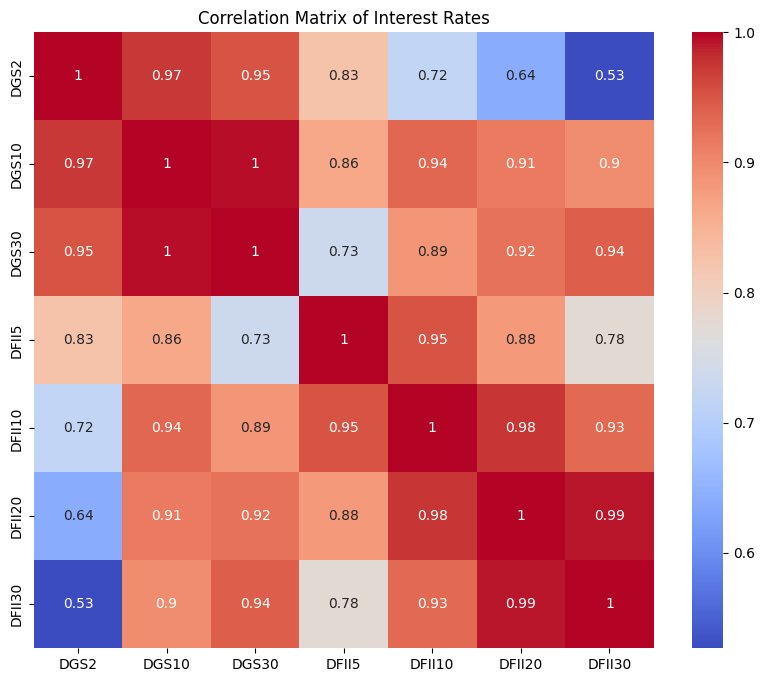

In [149]:
# plot a correlation matrix heatmap of interest rates
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(yields_df.iloc[:,1:].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Interest Rates')
plt.show()


In [151]:
yields_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16338 entries, 0 to 16337
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   day     16338 non-null  datetime64[ns]
 1   DGS2    12578 non-null  float64       
 2   DGS10   16338 non-null  float64       
 3   DGS30   12393 non-null  float64       
 4   DFII5   5641 non-null   float64       
 5   DFII10  5641 non-null   float64       
 6   DFII20  5233 non-null   float64       
 7   DFII30  3779 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 1021.3 KB


In [153]:
# SVD
from sklearn.decomposition import TruncatedSVD

# Select the columns related to yields for SVD (excluding the date)
yield_columns = ['DGS2', 'DGS10', 'DGS30', 'DFII5', 'DFII10', 'DFII20', 'DFII30']
yield_data = yields_df[yield_columns]

# Standardize the data (important for SVD)
yield_data_normalized = (yield_data - yield_data.mean()) / yield_data.std()

# Replace remaining NaNs (if any, after forward filling) with 0s
yield_data_normalized.fillna(0, inplace=True)
print(yield_data_normalized.shape)


(16338, 7)


In [154]:
from sklearn.decomposition import TruncatedSVD

# Perform SVD
svd = TruncatedSVD(n_components=min(len(yield_columns), yield_data_normalized.shape[0]))  # Limit to the number of components
svd.fit(yield_data_normalized)

# Get the singular values (variance explained by each component)
singular_values = svd.singular_values_

# Get the principal components (columns of V matrix, transposed)
principal_components = svd.components_

# Print singular values to check how much variance is explained by each component
print("Singular values (variance explained by each component):")
print(singular_values)

# Print the principal components (these represent the independent factors driving the yield curve)
print("\nPrincipal Components (loading for each maturity):")
print(principal_components)


Singular values (variance explained by each component):
[203.31466063 126.80214231  47.01221551  30.70185007  23.0048693
  19.77293363  10.36438894]

Principal Components (loading for each maturity):
[[ 0.53494086  0.61563986  0.53438197  0.12261735  0.12686022  0.11573999
   0.06882933]
 [-0.11525988 -0.14078266 -0.12715351  0.52879695  0.54321689  0.51597623
   0.33133838]
 [-0.14179536  0.04123827  0.10699948 -0.37207739 -0.21039363  0.04076743
   0.88451995]
 [ 0.64537523 -0.32344038 -0.26945986  0.36889113 -0.16140639 -0.40257835
   0.28647251]
 [-0.34317818  0.6334185  -0.3879743   0.29626316  0.07985366 -0.46909349
   0.12762647]
 [-0.26091059 -0.30502221  0.60708566  0.13149726  0.36907493 -0.55877326
   0.0678139 ]
 [ 0.27945075  0.02441281 -0.30843693 -0.57074788  0.68986338 -0.15609363
   0.01217009]]


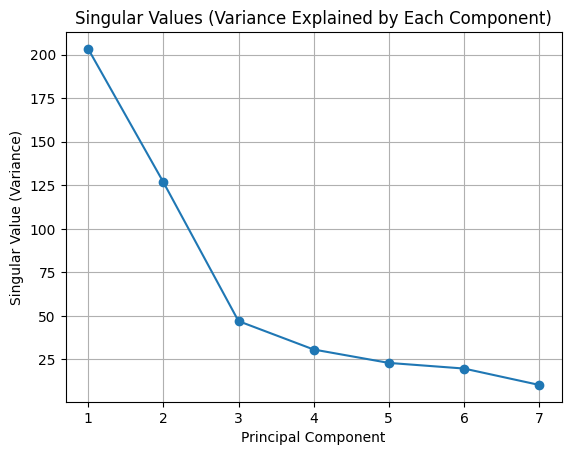

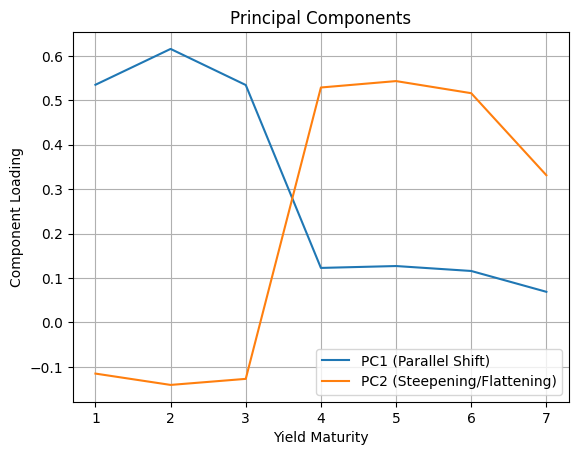

In [155]:
import matplotlib.pyplot as plt
import numpy as np

# Plot singular values (variance explained)
plt.plot(np.arange(1, len(singular_values) + 1), singular_values, marker='o')
plt.title('Singular Values (Variance Explained by Each Component)')
plt.xlabel('Principal Component')
plt.ylabel('Singular Value (Variance)')
plt.grid(True)
plt.show()

# Plot the first two principal components (PC1 and PC2)
plt.plot(np.arange(1, len(yield_columns) + 1), principal_components[0], label='PC1 (Parallel Shift)')
plt.plot(np.arange(1, len(yield_columns) + 1), principal_components[1], label='PC2 (Steepening/Flattening)')
plt.title('Principal Components')
plt.xlabel('Yield Maturity')
plt.ylabel('Component Loading')
plt.legend()
plt.grid(True)
plt.show()
